In [ ]:
import torch
import numpy as np
import random
import pandas as pd

def fixSeeds():
  # To make random weights in NN consistent from launch to launch on this device
  # To actually distinguish an improvement
  random.seed(0)
  np.random.seed(0)
  torch.manual_seed(0)
  torch.cuda.manual_seed(0)
  torch.backends.cudnn.deterministic = True

fixSeeds()

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

X_train.dtype, y_train.dtype

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


(torch.uint8, torch.int64)

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

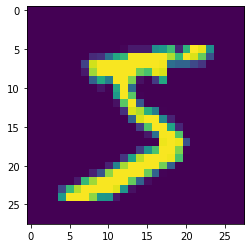

tensor(5)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
y_train[0]

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Fri Dec 24 19:54:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    76W / 149W |   3208MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch.nn as nn
class MNISTNet(nn.Module):
  def __init__(self, input_neurons, hidden_neurons):
    super(MNISTNet, self).__init__()
    self.input_neurons = input_neurons
    self.hidden_neurons = hidden_neurons

    self.fc1 = nn.Linear(input_neurons, hidden_neurons)
    self.al1 = nn.Sigmoid()
    self.fc2 = nn.Linear(hidden_neurons, 10)
  
  def forward(self, x):
    x = self.fc1(x)
    x = self.al1(x)
    x = self.fc2(x)
    return x
mnistNet = MNISTNet(28*28, 100)

In [ ]:
mnistNet = mnistNet.to(device)
mnistNet.parameters()

<generator object Module.parameters at 0x7f1c39f05c50>

In [ ]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnistNet.parameters(), lr=1e-3)

In [ ]:
batch_size = 100
# X_train = X_train.to(device)
# y_train = X_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

test_accuracy_history = []
test_loss_history = []
train_loss_history = []


for epoch in range(200):
  permutation = np.random.permutation(len(X_train))
  loss_value = 0
  for i in range(0, len(X_train), batch_size):
    optimizer.zero_grad()
    X_batch = X_train[permutation[i : i+batch_size]].to(device)
    y_batch = y_train[permutation[i : i+batch_size]].to(device)
    prediction = mnistNet.forward(X_batch)
    loss_value = loss(prediction, y_batch)
    loss_value.backward()
    optimizer.step()

  train_loss_history.append(loss_value)
  test_prediction = mnistNet.forward(X_test)
  accuracy = (test_prediction.argmax(dim=1) == y_test).float().mean()
  print(accuracy)
  test_loss_history.append(loss(test_prediction, y_test))
  test_accuracy_history.append(accuracy)

tensor(0.9088, device='cuda:0')
tensor(0.9141, device='cuda:0')
tensor(0.9204, device='cuda:0')
tensor(0.9240, device='cuda:0')
tensor(0.9261, device='cuda:0')
tensor(0.9232, device='cuda:0')
tensor(0.9301, device='cuda:0')
tensor(0.9310, device='cuda:0')
tensor(0.9295, device='cuda:0')
tensor(0.9315, device='cuda:0')
tensor(0.9283, device='cuda:0')
tensor(0.9284, device='cuda:0')
tensor(0.9341, device='cuda:0')
tensor(0.9320, device='cuda:0')
tensor(0.9342, device='cuda:0')
tensor(0.9392, device='cuda:0')
tensor(0.9390, device='cuda:0')
tensor(0.9383, device='cuda:0')
tensor(0.9377, device='cuda:0')
tensor(0.9353, device='cuda:0')
tensor(0.9411, device='cuda:0')
tensor(0.9390, device='cuda:0')
tensor(0.9377, device='cuda:0')
tensor(0.9345, device='cuda:0')
tensor(0.9375, device='cuda:0')
tensor(0.9414, device='cuda:0')
tensor(0.9417, device='cuda:0')
tensor(0.9417, device='cuda:0')
tensor(0.9427, device='cuda:0')
tensor(0.9455, device='cuda:0')
tensor(0.9416, device='cuda:0')
tensor(0

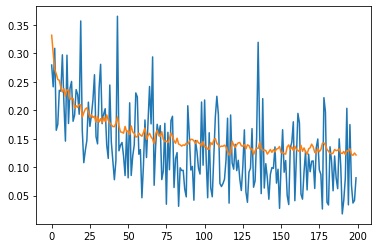

In [ ]:
plt.plot(train_loss_history)
plt.plot(test_loss_history)

torch.Size([4, 10, 8, 16])
